# Data Mining -  Computer Assignment 1
Mohammad Saadati - 
_810198410_

## Introduction
The goal of this computer assignment is review the data set of COVID-19, pre-processing, illustration and express our analysis based on the illustrations performed. This data set have information about patients, new tests, patient deaths and some features related to countries are given separately by day.

## Import Libraries
First of all, we import necessary libraries to use their functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.stats import norm
from shapely.geometry import LineString
import jdatetime
import datetime
import seaborn as sns
import datetime as dt

## Preprocessing
First we load csv file as a DataFrame using pandas library.

In [2]:
df = pd.read_csv("CA1_Dataset.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Question 1
In this part first we use two Pandas function (isna and sum) to count number of missing values at each column.

In [3]:
df.info()
pd.set_option('display.max_rows',None)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165636 entries, 0 to 165635
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165636 non-null  object 
 1   continent                                   155719 non-null  object 
 2   location                                    165636 non-null  object 
 3   date                                        165636 non-null  object 
 4   total_cases                                 162606 non-null  float64
 5   new_cases                                   162464 non-null  float64
 6   new_cases_smoothed                          160480 non-null  float64
 7   total_deaths                                144793 non-null  float64
 8   new_deaths                                  144833 non-null  float64
 9   new_deaths_smoothed                         142734 non-null  float64
 

iso_code                                           0
continent                                       9917
location                                           0
date                                               0
total_cases                                     3030
new_cases                                       3172
new_cases_smoothed                              5156
total_deaths                                   20843
new_deaths                                     20803
new_deaths_smoothed                            22902
total_cases_per_million                         3785
new_cases_per_million                           3927
new_cases_smoothed_per_million                  5905
total_deaths_per_million                       21585
new_deaths_per_million                         21545
new_deaths_smoothed_per_million                23638
reproduction_rate                              40569
icu_patients                                  142246
icu_patients_per_million                      

Now use fillna function to fill out the missing values in the given column.

In [4]:
unique_continent = df['continent'].unique()

for column in df:
    if df[column].isna().sum() > 0:
        if df[column].dtypes != object:
            if column[0] == 't' or column[0] == 'n':
                df[column].fillna(0, inplace=True)
            elif df[column].isna().sum() / df.shape[0] > 0.9:
                df[column].fillna(-np.inf, inplace=True)
            else:
                df[column].fillna(df[column].mean(), inplace=True)
        elif column == "continent":
            df['continent'] = df.apply(lambda row: row['location'] if (pd.isna(row['continent']) and (row['location'] in unique_continent)) 
                                       else ('Undefined' if pd.isna(row['continent']) else row['continent']) , axis=1)
        elif column == "tests_units":
            df['tests_units'].fillna(df['tests_units'].mode()[0], inplace=True) 
#             df['tests_units'] = df.apply( lambda row : df['tests_units'].mode()[0] if (df[df['location'] == row['location']]['tests_units'].isnull().values.all())
#                                         else (df[df['location'] == row['location']]['tests_units'].mode()[0] if pd.isna(row['tests_units'])
#                                         else row['tests_units']), axis = 1)

df.to_csv("df_p1_q1.csv")
df.isna().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million               

#### Advantages and disadvantages of using mean for missing values:
Missing values in your data do not reduce your sample size, as it would be the case with listwise deletion (the default of many statistical software packages, e.g. R, Stata, SAS or SPSS). Since mean imputation replaces all missing values, you can keep your whole database.

Replacing missing data by the mean of nonmissing data causes the population SD to be underestimated, but may also obscure important features of the population from which the data were sampled. Another possible disadvantage with using the mean for missing values is that the reason the values are missing in the first place could be dependent on the missing values themselves. (This is called missing not at random.)

Advantages : Easy to apply - Mean will not change

Disadvantages : Results may not be accurate - For large amount of NaN data this method can increase mod value significantly and cause error in results - The variance will decrease

### Question 2

In [5]:
pd.reset_option('display.max_rows')

df_p1_q2 = df[["location", "new_cases", "new_vaccinations", "new_deaths"]]
df_p1_q2 = df_p1_q2.groupby(by="location").sum()

df_p1_q2_p = df[["location", "population"]]
df_p1_q2_p = df_p1_q2_p.groupby(by="location").max()

df_p1_q2 = df_p1_q2.join(df_p1_q2_p)
df_p1_q2

,new_cases,new_vaccinations,new_deaths,population
location,,,,
Afghanistan,174081.0,1.374200e+04,7617.0,3.983543e+07
Africa,11230524.0,5.818190e+08,248668.0,1.373486e+09
Albania,271825.0,1.415150e+06,3474.0,2.872934e+06
Algeria,265079.0,1.707860e+05,6843.0,4.461663e+07
Andorra,38249.0,4.802000e+03,151.0,7.735400e+04
...,...,...,...,...
Wallis and Futuna,454.0,0.000000e+00,7.0,1.109400e+04
World,439011701.0,1.122516e+10,5946817.0,7.874966e+09
Yemen,11772.0,0.000000e+00,2135.0,3.049064e+07


### Question 3
In this part we use **jdatetime.date.fromgregorian** function from `jdatetime` library to convert gregorian date to shamsi date and store the result in *shamsi_date* column of a new dataframe called **df_p1_q3**.

In [6]:
def convert_gregorian_date_to_shamsi_date(gregorian_date):
    y, m , d = gregorian_date.split("-")
    return str(jdatetime.date.fromgregorian(day=int(d),month=int(m),year=int(y)))

df['shamsi_date'] = df['date']

for index, row in df.iterrows():
    shamsi_date = convert_gregorian_date_to_shamsi_date(row['shamsi_date'])
    df.at[index,'shamsi_date'] = shamsi_date

#df.to_csv("df_p1_q3.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,shamsi_date
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-05
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-06
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-07
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-08
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,32.778255,37.746,0.5,64.83,0.511,-inf,-inf,-inf,-inf,1398-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165631,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-07
165632,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-08
165633,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-09
165634,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,30.700000,36.791,1.7,61.49,0.571,-inf,-inf,-inf,-inf,1400-12-10


### Question 4
Redundant attributes may be able to be detected by correlation analysis and covariance analysis

In [7]:
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.806677,0.827899,0.968956,0.726685,0.747316,0.104767,0.032705,0.043368,0.137671,...,-0.002716,-0.005809,0.025074,-0.004761,0.010728,0.029702,0.802190,0.139572,0.034064,0.228241
new_cases,0.806677,1.000000,0.976958,0.735240,0.668096,0.654269,0.097389,0.088765,0.098912,0.103075,...,0.002898,-0.001433,0.020072,0.002557,0.012515,0.028335,0.464078,0.090745,0.092382,0.124742
new_cases_smoothed,0.827899,0.976958,1.000000,0.749612,0.663865,0.673995,0.101359,0.078399,0.101462,0.105567,...,0.002698,-0.001564,0.020375,0.002142,0.012423,0.028472,0.509117,0.075321,0.070259,0.127365
total_deaths,0.968956,0.735240,0.749612,1.000000,0.781224,0.803281,0.085529,0.017392,0.022912,0.156600,...,-0.006089,-0.006023,0.030088,-0.006634,0.010865,0.030726,0.928284,0.338096,0.110488,0.370520
new_deaths,0.726685,0.668096,0.663865,0.781224,1.000000,0.975575,0.031455,0.016238,0.017744,0.085165,...,-0.006418,-0.000462,0.032785,-0.003287,0.009868,0.032106,0.493040,0.301056,0.395089,0.193819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,0.029702,0.028335,0.028472,0.030726,0.032106,0.032645,0.343099,0.158589,0.199781,0.326067,...,0.483810,0.082491,0.447246,0.468142,0.847106,1.000000,-0.102242,-0.347135,-0.290497,-0.231463
excess_mortality_cumulative_absolute,0.802190,0.464078,0.509117,0.928284,0.493040,0.655323,0.169916,0.008444,0.018781,0.376935,...,-0.122511,-0.115914,0.102151,-0.168047,-0.195392,-0.102242,1.000000,0.397512,0.167042,0.445995
excess_mortality_cumulative,0.139572,0.090745,0.075321,0.338096,0.301056,0.254753,0.232222,0.057043,0.041999,0.651316,...,-0.261507,-0.066339,0.203881,-0.252829,-0.253115,-0.347135,0.397512,1.000000,0.551706,0.738794
excess_mortality,0.034064,0.092382,0.070259,0.110488,0.395089,0.322358,0.100555,0.118010,0.117073,0.264369,...,-0.119547,0.052966,0.145492,-0.111678,-0.257628,-0.290497,0.167042,0.551706,1.000000,0.382483


### Question 5

In [8]:
df_iran = df[df["iso_code"] == "IRN"]
df_iran

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,shamsi_date
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,0.000,2.0,2.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-11-30
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,0.000,2.0,0.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-01
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,0.000,4.0,2.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-02
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,0.000,5.0,1.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-03
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,0.000,8.0,3.0,0.000,...,21.1,50.790872,1.5,76.68,0.783,-2658.0,-4.14,2.79,-31.260011,1398-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429,136390.0,224.0,227.429,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-07
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143,136631.0,241.0,227.286,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-08
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143,136838.0,207.0,223.143,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-09
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143,137064.0,226.0,223.571,...,21.1,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-10


### Question 6

In [9]:
df_iran['shamsi_month'] = df_iran["shamsi_date"]

for index, row in df_iran.iterrows():
    y, m , d = row['shamsi_date'].split("-")
    df_iran.at[index,'shamsi_month'] = m

df_iran

<ipython-input-9-8ab355a04e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iran['shamsi_month'] = df_iran["shamsi_date"]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,shamsi_date,shamsi_month
71639,IRN,Asia,Iran,2020-02-19,2.0,2.0,0.000,2.0,2.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-11-30,11
71640,IRN,Asia,Iran,2020-02-20,5.0,3.0,0.000,2.0,0.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-01,12
71641,IRN,Asia,Iran,2020-02-21,18.0,13.0,0.000,4.0,2.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-02,12
71642,IRN,Asia,Iran,2020-02-22,28.0,10.0,0.000,5.0,1.0,0.000,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1398-12-03,12
71643,IRN,Asia,Iran,2020-02-23,43.0,15.0,0.000,8.0,3.0,0.000,...,50.790872,1.5,76.68,0.783,-2658.0,-4.14,2.79,-31.260011,1398-12-04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72377,IRN,Asia,Iran,2022-02-26,7030943.0,7039.0,15065.429,136390.0,224.0,227.429,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-07,12
72378,IRN,Asia,Iran,2022-02-27,7040467.0,9524.0,14002.143,136631.0,241.0,227.286,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-08,12
72379,IRN,Asia,Iran,2022-02-28,7051429.0,10962.0,12838.143,136838.0,207.0,223.143,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-09,12
72380,IRN,Asia,Iran,2022-03-01,7060741.0,9312.0,11015.143,137064.0,226.0,223.571,...,50.790872,1.5,76.68,0.783,-inf,-inf,-inf,-inf,1400-12-10,12


### Question 7

In [10]:
new_column = []
for column in df_iran:
    if column[0] == 'n':
        new_column.append(column)
new_column.append('shamsi_month')
        
df_iran_new_column = df_iran[new_column].copy()
new_column.pop()
df_iran.drop(new_column, axis = 1, inplace = True)
    
df_p1_q7 = df_iran.groupby(by="shamsi_month").max()
df_iran_new_column = df_iran_new_column.groupby(by="shamsi_month").sum()

df_p1_q7 = df_p1_q7.join(df_iran_new_column)
df_p1_q7.to_csv("df_p1_q7.csv")
df_p1_q7

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients,...,new_deaths_smoothed_per_million,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
shamsi_month,,,,,,,,,,,,,,,,,,,,,
01,IRN,Asia,Iran,2021-04-20,2286927.0,67525.0,26895.923,794.143,1.81,903.707952,...,104.570,730425.0,8.592,2467835.0,29.022,71691.0,403349.0,4741.0,284774.0,0.339
02,IRN,Asia,Iran,2021-05-21,2815882.0,78194.0,33116.818,919.618,1.27,903.707952,...,155.468,409622.0,4.817,4373639.0,51.435,129369.0,1937861.0,22790.0,1701185.0,2.002
03,IRN,Asia,Iran,2021-06-21,3105620.0,83101.0,36524.348,977.328,1.30,903.707952,...,87.378,658679.0,7.744,4542917.0,53.426,0.0,2432576.0,28607.0,1897683.0,2.227
04,IRN,Asia,Iran,2021-07-22,3623840.0,88063.0,42618.992,1035.685,1.38,903.707952,...,111.742,777132.0,9.138,3724340.0,43.798,0.0,3276433.0,38530.0,1884147.0,2.213
05,IRN,Asia,Iran,2021-08-22,4677114.0,102038.0,55006.259,1200.041,1.28,903.707952,...,221.069,1245457.0,14.647,3250257.0,38.228,0.0,12940963.0,152194.0,10180866.0,11.972
06,IRN,Asia,Iran,2021-09-22,5477229.0,118191.0,64416.193,1390.012,1.26,903.707952,...,246.029,3072546.0,36.135,4207928.0,49.488,2587215.0,21652513.0,254648.0,12837489.0,15.097
07,IRN,Asia,Iran,2021-10-22,5844589.0,124928.0,68736.613,1469.244,1.26,903.707952,...,161.503,2017449.0,23.725,4040342.0,47.517,0.0,32477191.0,381956.0,20348580.0,23.934
08,IRN,Asia,Iran,2021-11-21,6077438.0,128956.0,71475.087,1516.616,1.32,903.707952,...,190.918,2230156.0,26.230,4291678.0,50.474,0.0,25418375.0,298939.0,6997855.0,8.231
09,IRN,Asia,Iran,2021-12-21,6175782.0,131167.0,72631.684,1542.619,1.12,903.707952,...,152.994,2279653.0,26.809,4520663.0,53.166,171719.0,12062583.0,141866.0,2785809.0,3.280


## Display data

### Question 1

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


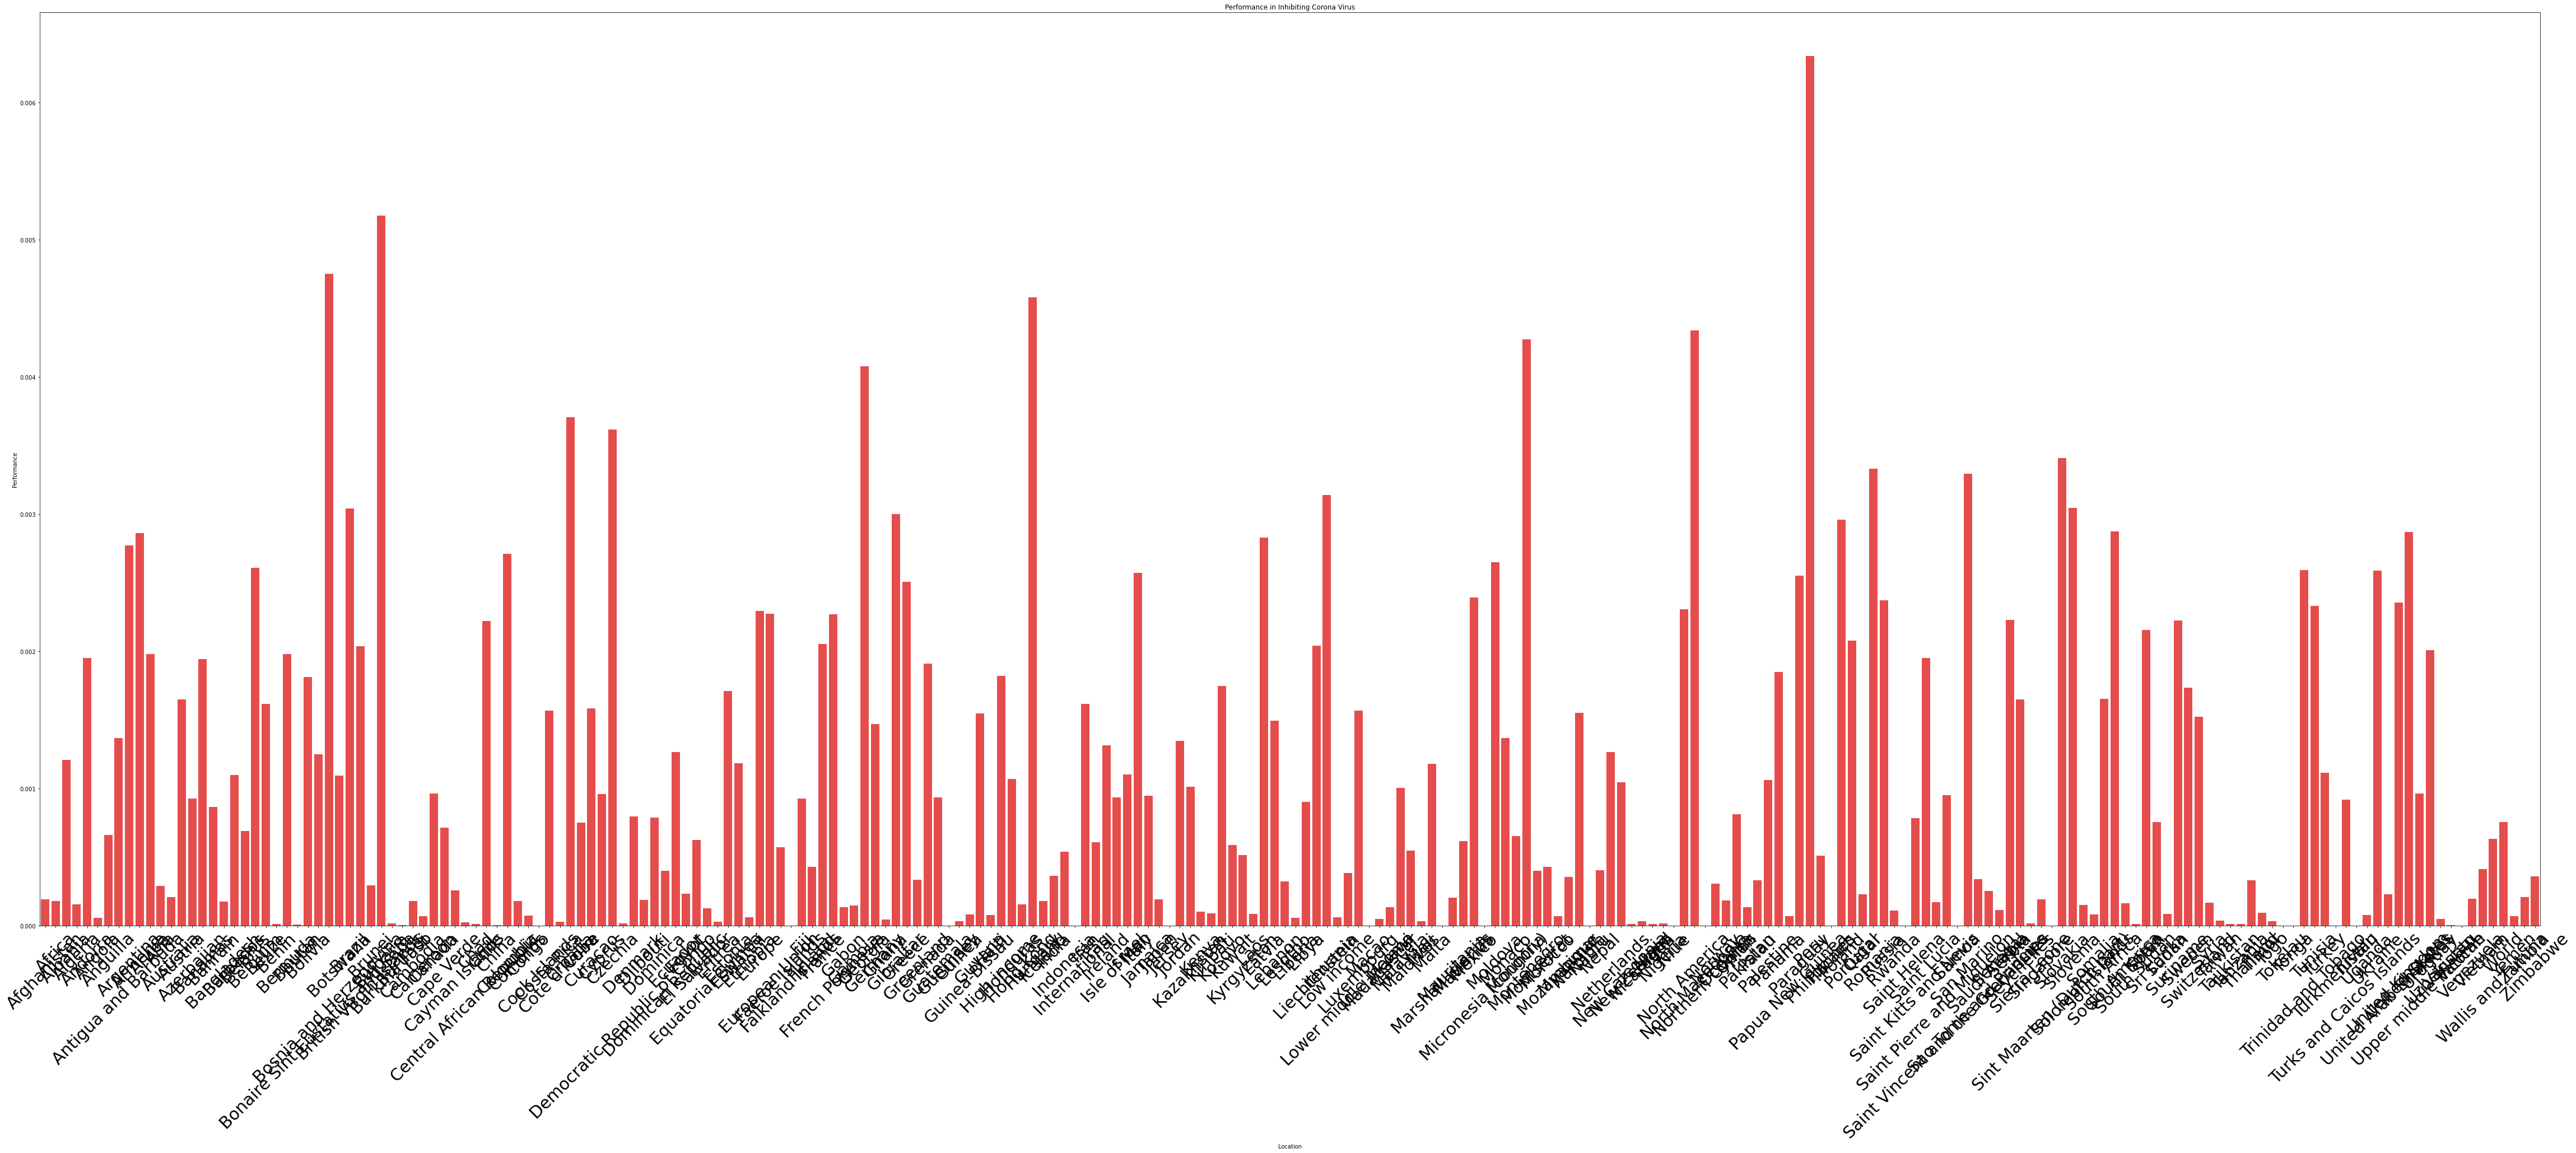

In [11]:
color = ['r', 'g', 'b']
plt.figure(figsize=(80,30))
ax = sns.barplot(df_p1_q2.index, df_p1_q2['new_deaths'] / df_p1_q2['population'], alpha=0.8, color=color[0])
ax.set_title("Performance in Inhibiting Corona Virus")
ax.set_xlabel('Location')
ax.set_ylabel('Performance')
ax.set_xticklabels(df_p1_q2.index, rotation='vertical', fontsize=30)
plt.xticks(rotation = 45)
plt.show()

### Question 2

In [12]:
pd.set_option('display.max_rows',None)

df_p2_q2= df_p1_q2.copy()
df_p2_q2['ratio1'] = (df_p2_q2['new_vaccinations'] / df_p2_q2['population']) 
df_p2_q2['ratio2'] = (df_p2_q2['new_deaths'] / df_p2_q2['population']) 

df_p2_q2 = df_p2_q2.sort_values(by= ['ratio1'], ascending= [False])

df_p2_q2

,new_cases,new_vaccinations,new_deaths,population,ratio1,ratio2
location,,,,,,
Cuba,1070730.0,3.065243e+07,8497.0,1.131750e+07,2.708410,7.507843e-04
Gibraltar,15632.0,8.906400e+04,101.0,3.369100e+04,2.643555,2.997833e-03
Chile,3098110.0,4.855777e+07,42624.0,1.921236e+07,2.527423,2.218572e-03
Singapore,767663.0,1.357254e+07,1040.0,5.453600e+06,2.488730,1.906997e-04
Malta,71497.0,1.205547e+06,608.0,5.161000e+05,2.335879,1.178066e-03
South Korea,3691487.0,1.192514e+08,8394.0,5.130518e+07,2.324354,1.636092e-04
Denmark,2805858.0,1.317204e+07,4633.0,5.813302e+06,2.265845,7.969653e-04
Italy,12868066.0,1.343115e+08,155245.0,6.036747e+07,2.224899,2.571666e-03
Uruguay,846889.0,7.622054e+06,7005.0,3.485152e+06,2.187008,2.009955e-03


In [13]:
c = ['France', 'Brazil','Estonia','Azerbaijan','Paraguay']

df_p2_q2 = df_p2_q2.loc[c] 
df_p2_q2

,new_cases,new_vaccinations,new_deaths,population,ratio1,ratio2
location,,,,,,
France,23316777.0,140849628.0,138537.0,67422000.0,2.089075,0.002055
Brazil,28741413.0,390272980.0,650254.0,213993441.0,1.823761,0.003039
Estonia,504148.0,1955946.0,2268.0,1325188.0,1.475976,0.001711
Azerbaijan,787367.0,10231821.0,9454.0,10223344.0,1.000829,0.000925
Paraguay,642573.0,4105501.0,18422.0,7219641.0,0.568657,0.002552


C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


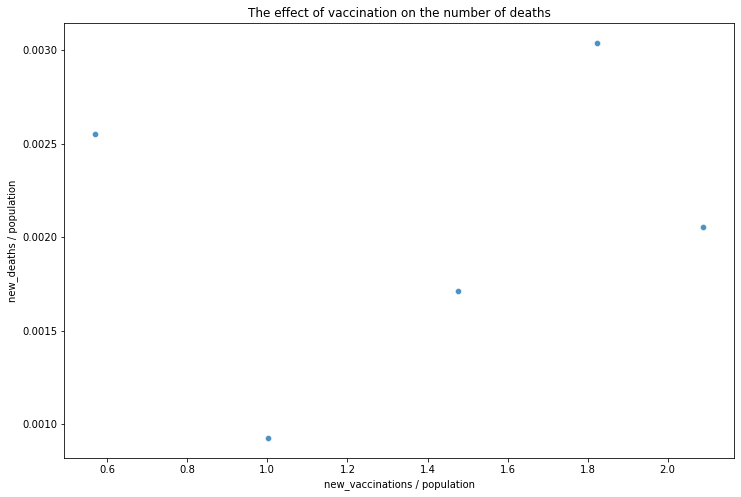

In [14]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(df_p2_q2['ratio1'], df_p2_q2['ratio2'], alpha=0.8,)
ax.set_title("The effect of vaccination on the number of deaths")
ax.set_xlabel('new_vaccinations / population')
ax.set_ylabel('new_deaths / population')
plt.show()

### Question 3

In [15]:
df_p2_q3 = df_p1_q2.sort_values(by= ['new_vaccinations'], ascending= [False])
df_p2_q3 

,new_cases,new_vaccinations,new_deaths,population
location,,,,
World,439011701.0,1.122516e+10,5946817.0,7.874966e+09
Asia,117811418.0,7.544342e+09,1351250.0,4.678445e+09
Upper middle income,118212049.0,4.804681e+09,2421471.0,2.513673e+09
Lower middle income,82588725.0,3.974325e+09,1271503.0,3.330653e+09
China,109423.0,3.061013e+09,4640.0,1.444216e+09
High income,236393139.0,2.306054e+09,2211971.0,1.214930e+09
India,42945160.0,1.708969e+09,507015.0,1.393409e+09
Europe,158815550.0,1.247823e+09,1717056.0,7.489630e+08
North America,93195128.0,1.030269e+09,1374621.0,5.965813e+08


In [83]:
c = ['Brazil', 'Italy', 'Croatia', 'Oman', 'Yemen']

df_p2_q3 = df[df['location'].isin(c)]
df_p2_q3 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,shamsi_date
21222,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.000,0.0,0.0,0.000,...,17.9,50.790872,2.2,75.88,0.765,-inf,-inf,-inf,-inf,1398-12-07
21223,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,50.790872,2.2,75.88,0.765,-inf,-inf,-inf,-inf,1398-12-08
21224,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,50.790872,2.2,75.88,0.765,-inf,-inf,-inf,-inf,1398-12-09
21225,BRA,South America,Brazil,2020-02-29,2.0,1.0,0.000,0.0,0.0,0.000,...,17.9,50.790872,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066,1398-12-10
21226,BRA,South America,Brazil,2020-03-01,2.0,0.0,0.000,0.0,0.0,0.000,...,17.9,50.790872,2.2,75.88,0.765,-inf,-inf,-inf,-inf,1398-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164203,YEM,Asia,Yemen,2022-02-26,11760.0,1.0,4.143,2133.0,2.0,1.857,...,29.2,49.542000,0.7,66.12,0.470,-inf,-inf,-inf,-inf,1400-12-07
164204,YEM,Asia,Yemen,2022-02-27,11769.0,9.0,4.714,2134.0,1.0,1.714,...,29.2,49.542000,0.7,66.12,0.470,-inf,-inf,-inf,-inf,1400-12-08
164205,YEM,Asia,Yemen,2022-02-28,11771.0,2.0,4.286,2135.0,1.0,1.714,...,29.2,49.542000,0.7,66.12,0.470,-inf,-inf,-inf,-inf,1400-12-09
164206,YEM,Asia,Yemen,2022-03-01,11771.0,0.0,3.571,2135.0,0.0,1.571,...,29.2,49.542000,0.7,66.12,0.470,-inf,-inf,-inf,-inf,1400-12-10


<ipython-input-84-9525d91d0a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2_q3['date'] = pd.to_datetime(df_p2_q3['date'])
<ipython-input-84-9525d91d0a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2_q3['gregorian_month'] = df_p2_q3['date'].dt.month


<AxesSubplot:title={'center':'Var1'}, xlabel='gregorian_month'>

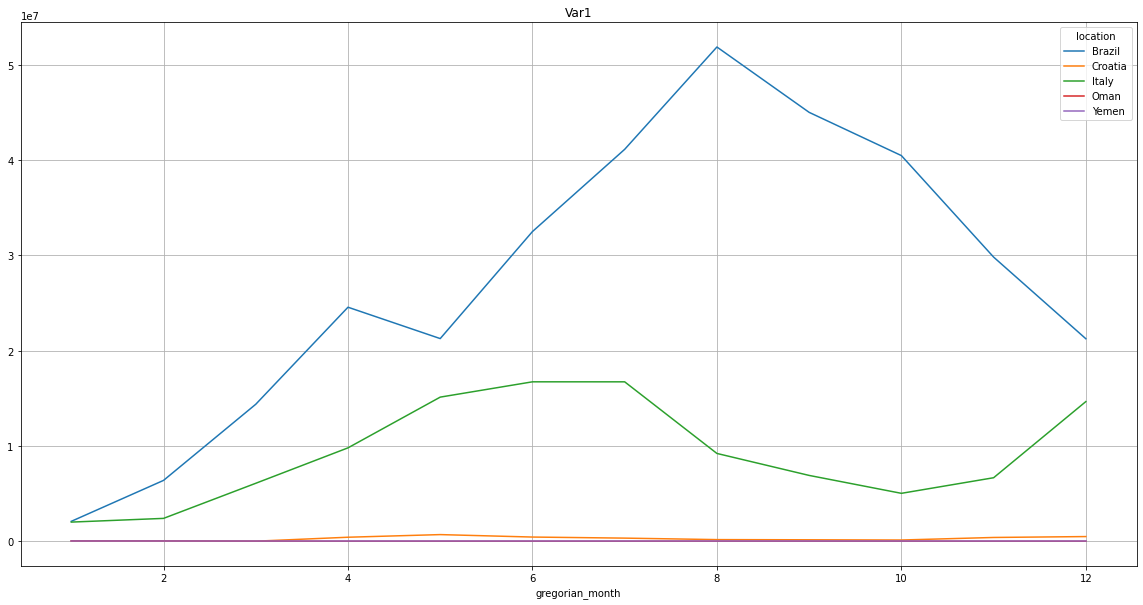

In [84]:
df_p2_q3['date'] = pd.to_datetime(df_p2_q3['date'])
df_p2_q3 = df_p2_q3 [df_p2_q3 ['date'].dt.year == 2021]
df_p2_q3['gregorian_month'] = df_p2_q3['date'].dt.month

df_p2_q3 = df_p2_q3.groupby(by=['location', "gregorian_month"]).sum()

df_p2_q3.reset_index().pivot('gregorian_month','location','new_vaccinations').plot( title='Var1', grid=True, figsize=(20, 10))

### Question 4

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


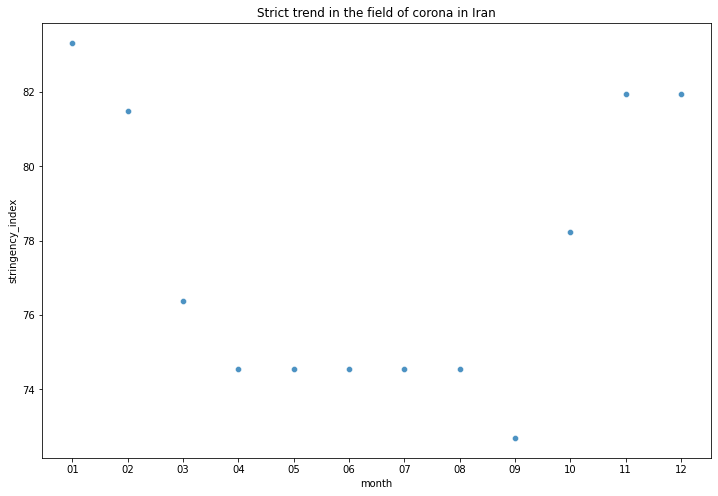

In [16]:
pd.reset_option('display.max_rows')

plt.figure(figsize=(12,8))
ax = sns.scatterplot(df_p1_q7.index, df_p1_q7['stringency_index'], alpha=0.8,)
ax.set_title("Strict trend in the field of corona in Iran")
ax.set_xlabel('month')
ax.set_ylabel('stringency_index')
plt.show()

### Question 5

AttributeError: 'dict' object has no attribute 'set_xlabel'

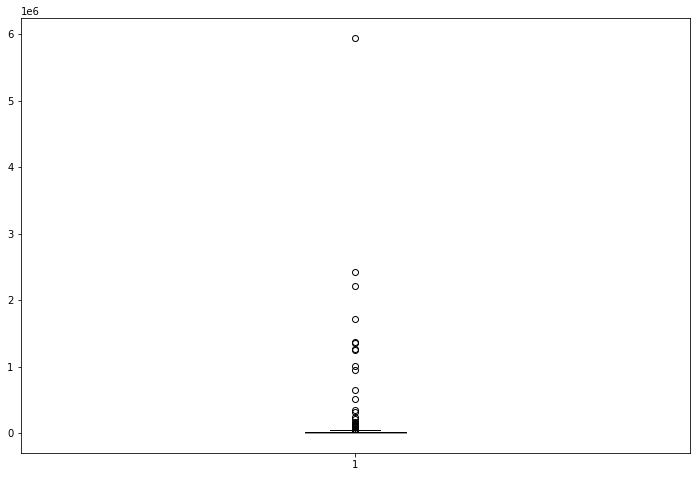

In [17]:
plt.figure(figsize=(12,8))
ax = plt.boxplot( df_p1_q2['new_deaths'])
ax.set_xlabel('Category')
ax.set_ylabel('Number of Occurrences')
plt.show()

### Question 6

In [86]:
df_p2_q6 = df[["location", "new_cases", "new_deaths"]]
df_p2_q6 = df_p2_q6.groupby(by="location").sum()

df_p2_q6_p = df[["location", "population_density", "median_age", "handwashing_facilities", 
                 "hospital_beds_per_thousand", "human_development_index"]]
df_p2_q6_p = df_p2_q6_p.groupby(by="location").max()

df_p2_q6 = df_p2_q6.join(df_p2_q6_p)
df_p2_q6

,new_cases,new_deaths,population_density,median_age,handwashing_facilities,hospital_beds_per_thousand,human_development_index
location,,,,,,,
Afghanistan,174081.0,7617.0,54.422000,18.600000,37.746000,0.500000,0.511000
Africa,11230524.0,248668.0,464.408404,30.568558,50.790872,3.027939,0.725595
Albania,271825.0,3474.0,104.871000,38.000000,50.790872,2.890000,0.795000
Algeria,265079.0,6843.0,17.348000,29.100000,83.741000,1.900000,0.748000
Andorra,38249.0,151.0,163.755000,30.568558,50.790872,3.027939,0.868000
...,...,...,...,...,...,...,...
Wallis and Futuna,454.0,7.0,464.408404,30.568558,50.790872,3.027939,0.725595
World,439011701.0,5946817.0,58.045000,30.900000,60.130000,2.705000,0.737000
Yemen,11772.0,2135.0,53.508000,20.300000,49.542000,0.700000,0.470000


C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


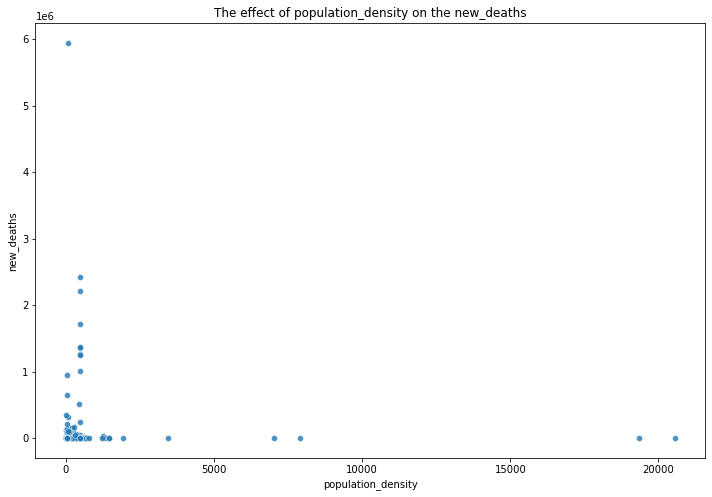

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


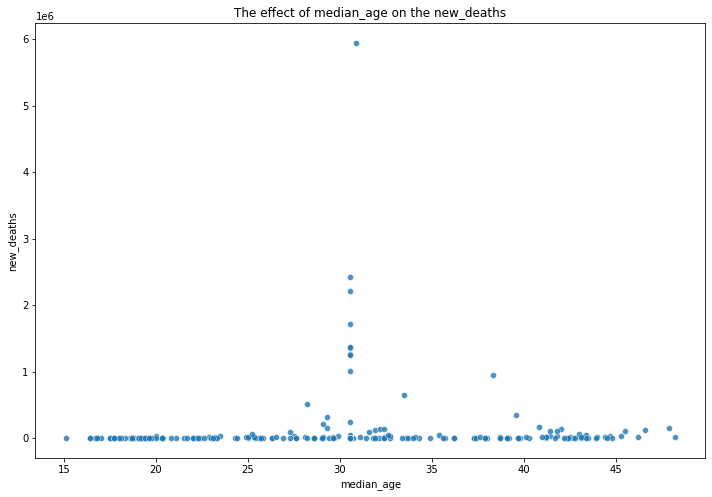

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


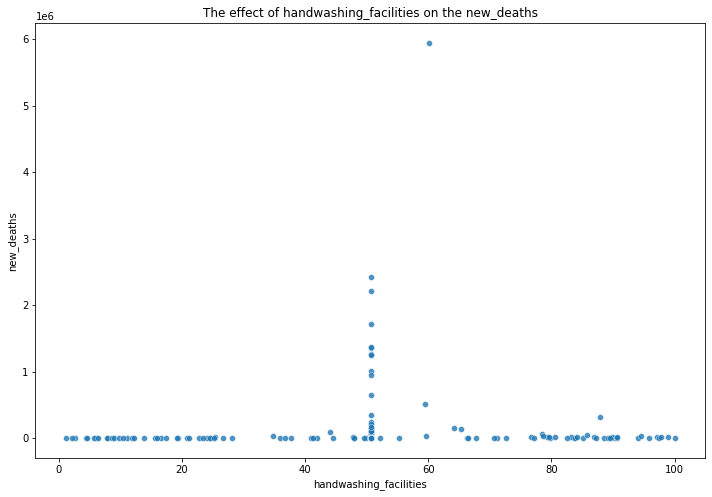

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


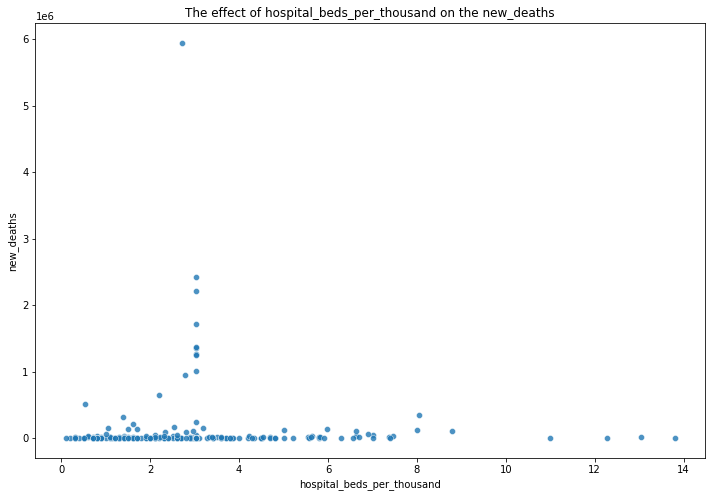

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


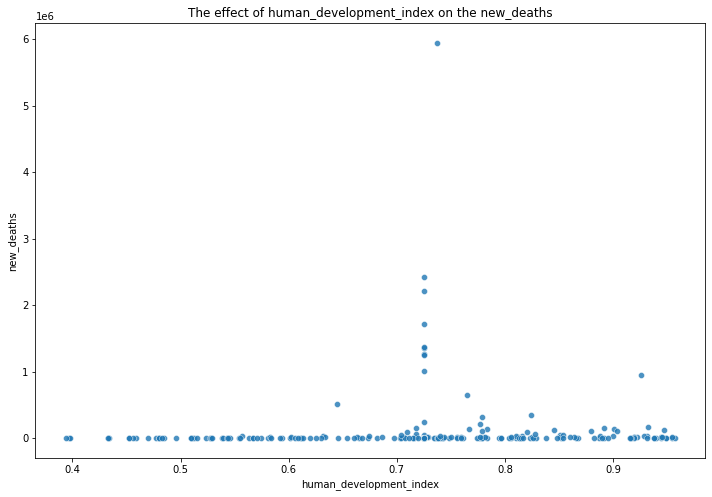

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


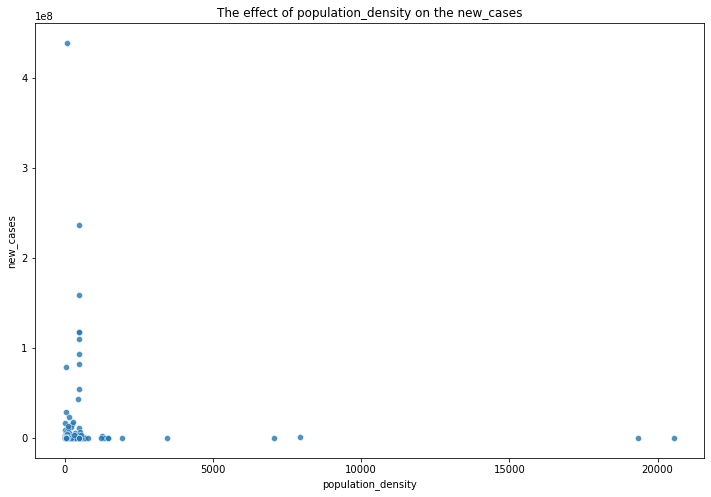

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


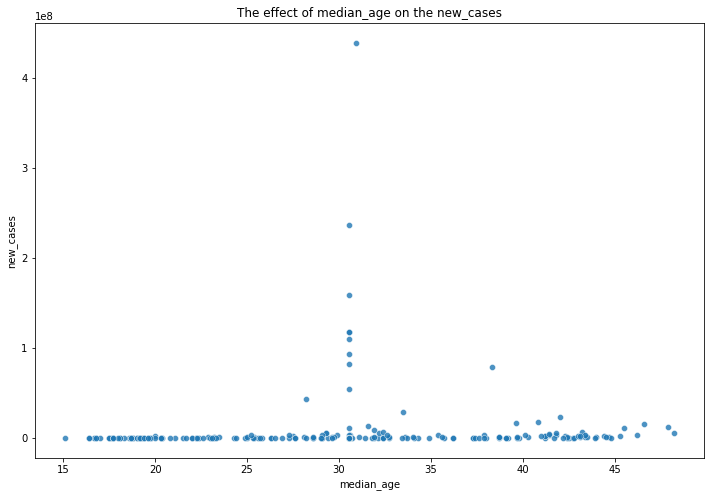

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


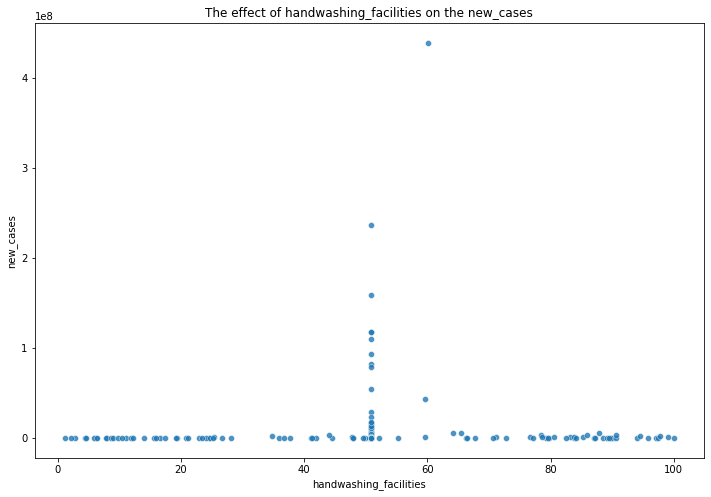

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


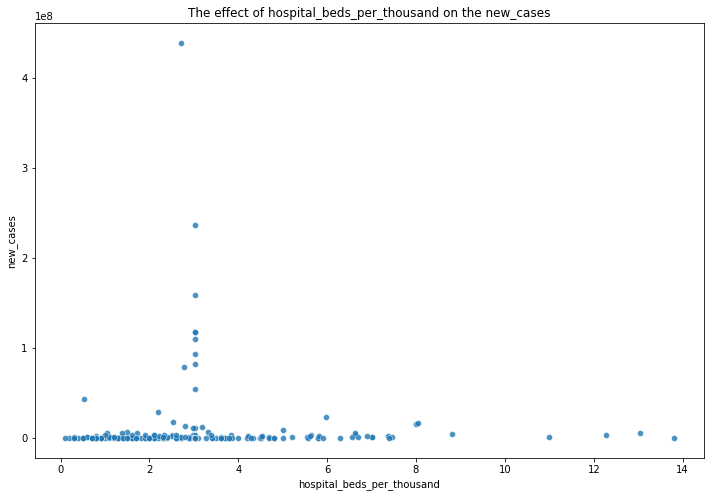

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


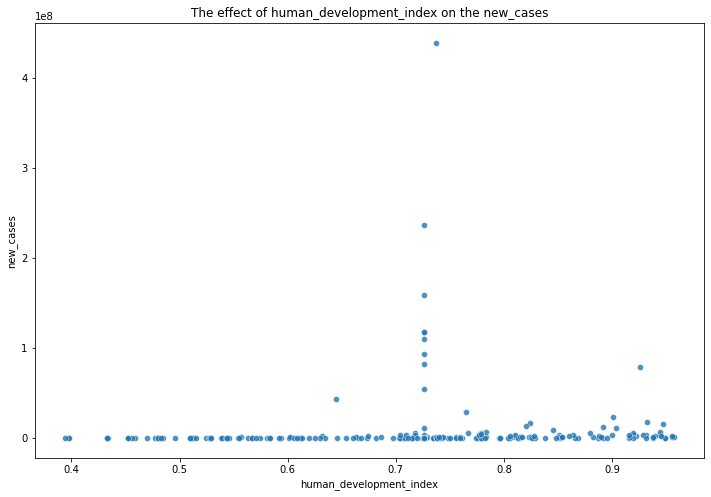

In [92]:
for i in ["new_deaths", "new_cases"]:
    for j in ["population_density", "median_age", "handwashing_facilities", 
                 "hospital_beds_per_thousand", "human_development_index"]:
        plt.figure(figsize=(12,8))
        ax = sns.scatterplot(df_p2_q6[j], df_p2_q6[i], alpha=0.8,)
        _title = "The effect of " + j + " on the " + i
        ax.set_title(_title)
        ax.set_xlabel(j)
        ax.set_ylabel(i)
        plt.show()

### Question 7

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


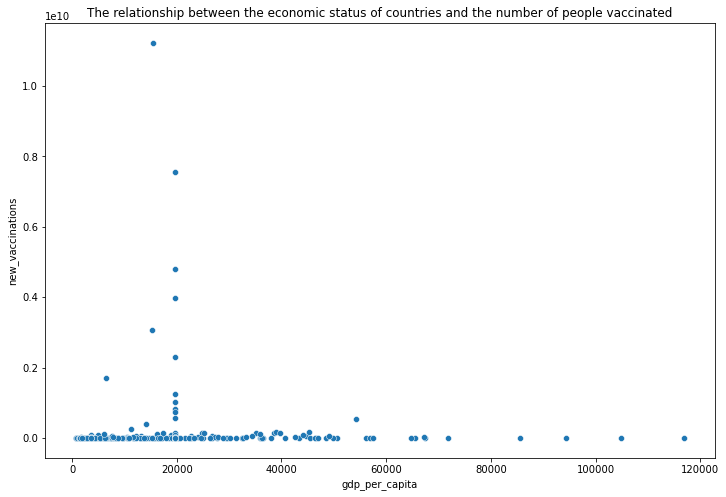

In [26]:
df_p2_q7 = df[["location", 'gdp_per_capita']]
df_p2_q7 = df_p2_q7.groupby(by="location").max()
df_p2_q7 = df_p1_q2.join(df_p2_q7)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(df_p2_q7['gdp_per_capita'], df_p2_q7['new_vaccinations'])
ax.set_title("The relationship between the economic status of countries and the number of people vaccinated")
ax.set_xlabel('gdp_per_capita')
ax.set_ylabel('new_vaccinations')

plt.show()

### Question 8

<ipython-input-27-379c93e81112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2_q8['gregorian_month'] = df_p2_q8['date'].dt.month
C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


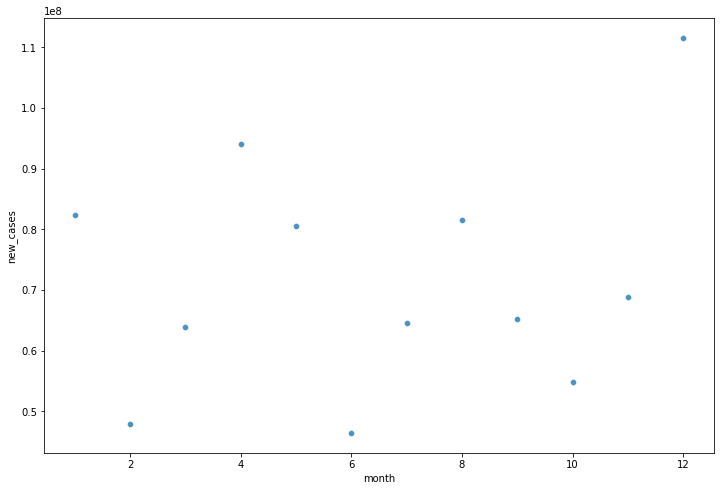

In [27]:
df['date'] = pd.to_datetime(df['date'])
df_p2_q8 = df[df['date'].dt.year == 2021]
df_p2_q8['gregorian_month'] = df_p2_q8['date'].dt.month

df_p2_q8 = df_p2_q8[['gregorian_month', 'new_cases']]
df_p2_q8 = df_p2_q8.groupby(by="gregorian_month").sum()

plt.figure(figsize=(12,8))
ax = sns.scatterplot(df_p2_q8.index, df_p2_q8['new_cases'], alpha=0.8)
ax.set_xlabel('Distribution of the number of patients by month')
ax.set_xlabel('month')
ax.set_ylabel('new_cases')
plt.show()



## Bonus questions

### Question 1

### Question 2